In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV files
#Hdf = pd.read_csv('Resources/Hdata.csv')
adolescent_birth_rate = pd.read_csv('output/Adelocsent_birthRate.csv')
birth_by_skilled_personnel = pd.read_csv('output/birth_by_skilled_personnel.csv')

care_coverage = pd.read_csv('output/care_coverage.csv')

family_planning = pd.read_csv('output/family_planning.csv')


1: Access to Family Planning

In [3]:
birth_by_skilled_personnel2= birth_by_skilled_personnel.copy()
birth_by_skilled_personnel2.rename(columns={'Value': 'birth_by_skilled_person'}, inplace=True)

In [4]:
adolescent_birth_rate.dtypes

ParentLocation            object
Location                  object
Period                     int64
Age-group                 object
Adolescent_birth_rate    float64
FactComments              object
dtype: object

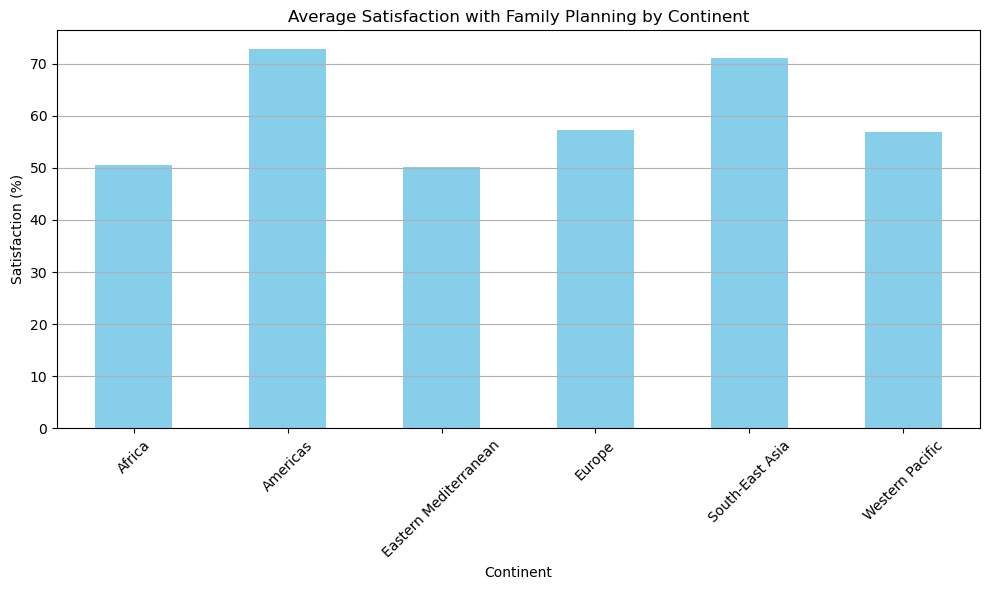

In [5]:
# Group by continent and calculate mean satisfaction with family planning
continent_mean = family_planning.groupby('ParentLocation_Continent')['Fact_Value_%'].mean()

# Plotting
plt.figure(figsize=(10, 6))
continent_mean.plot(kind='bar', color='skyblue')
plt.title('Average Satisfaction with Family Planning by Continent')
plt.xlabel('Continent')
plt.ylabel('Satisfaction (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

2: Reproductive Health Outcomes

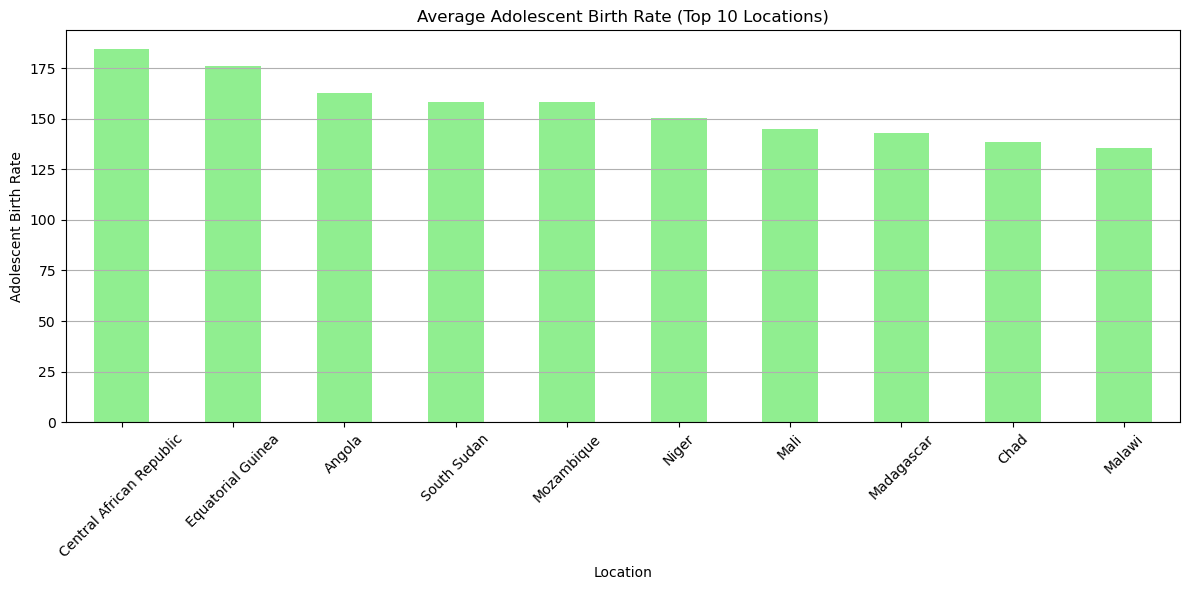

In [6]:
# Filter for 15-19 years age group
adolescent_15_19 = adolescent_birth_rate[adolescent_birth_rate['Age-group'] == '15-19 years']

# Calculate average adolescent birth rate by location
avg_birth_rate = adolescent_15_19.groupby('Location')['Adolescent_birth_rate'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_birth_rate.head(10).plot(kind='bar', color='lightgreen')
plt.title('Average Adolescent Birth Rate (Top 10 Locations)')
plt.xlabel('Location')
plt.ylabel('Adolescent Birth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3: Maternal Well-being

In [7]:
care_coverage= care_coverage[['Location', 'Anatal_care%', 'Period']]
birth_by_skilled_personnel = birth_by_skilled_personnel2[['Location', 'birth_by_skilled_person', 'Period']]


In [8]:


# Select relevant columns for merging
antenatal_df =care_coverage[['Location', 'Anatal_care%', 'Period']]
skilled_births_df = birth_by_skilled_personnel[['Location', 'birth_by_skilled_person', 'Period']]

# Merge datasets on 'Location' and 'Period'
merged_df = pd.merge(antenatal_df, skilled_births_df, on=['Location', 'Period'], how='inner')


In [9]:
# Clean non-numeric values
merged_df = merged_df[~merged_df['Anatal_care%'].astype(str).str.contains('see note')]
merged_df = merged_df[~merged_df['birth_by_skilled_person'].astype(str).str.contains('see note')]

# Convert columns to numeric
merged_df['Anatal_care%'] = pd.to_numeric(merged_df['Anatal_care%'], errors='coerce')
merged_df['birth_by_skilled_person'] = pd.to_numeric(merged_df['birth_by_skilled_person'], errors='coerce')

# Calculate Pearson correlation coefficient
correlation = merged_df['Anatal_care%'].corr(merged_df['birth_by_skilled_person'])

print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.4388758691809277


In [10]:
merged_df.to_csv("output/care_and_birth.csv", index=False)

 a Pearson correlation coefficient of 0.4389 indicates a moderate positive relationship between antenatal care coverage and births attended by skilled personnel, providing valuable insight into maternal health indicators.

In [11]:
merged_df.dtypes


Location                    object
Anatal_care%               float64
Period                      object
birth_by_skilled_person    float64
dtype: object

adolescent_birth_rate


birth_by_skilled_personnel


care_coverage


family_planning


# Reproductive Health Outcomes: What is the correlation between access to modern family planning methods and adolescent birth rates?